In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Death = pd.read_csv('/content/1698424155860-Death.csv',encoding='UTF-8-sig',sep=',')
Death.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,6.388,6.241,6.118,6.012,5.920,5.839,5.770,5.716,...,7.780,7.918,8.061,8.205,8.347,8.488,8.627,8.765,8.907,9.053
1,Afghanistan,AFG,32.219,31.649,31.093,30.551,30.022,29.501,28.985,28.468,...,8.584,8.250,7.936,7.645,7.380,7.141,6.929,6.742,6.575,6.423
2,Angola,AGO,27.097,26.859,26.627,26.407,26.194,25.966,25.690,25.342,...,12.367,11.680,11.039,10.451,9.921,9.454,9.052,8.716,8.432,8.190
3,Albania,ALB,11.326,10.719,10.175,9.707,9.320,9.009,8.762,8.555,...,6.756,6.841,6.915,6.996,7.096,7.219,7.367,7.534,7.714,7.898
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.200,2.800,NaN,3.900,NaN,NaN,NaN,4.300,NaN,4.400


In [2]:
Birth = pd.read_csv('/content/1698424162537-Birth.csv',encoding='UTF-8-sig',sep=',')
Birth.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,35.679,34.529,33.320,32.050,30.737,29.413,28.121,26.908,...,11.361,11.214,11.123,11.090,11.111,11.179,11.281,11.404,11.532,11.652
1,Afghanistan,AFG,51.279,51.373,51.457,51.530,51.589,51.631,51.652,51.650,...,40.903,39.829,38.750,37.690,36.670,35.706,34.809,33.981,33.211,32.487
2,Angola,AGO,49.080,48.779,48.547,48.430,48.450,48.622,48.936,49.343,...,46.143,45.656,45.102,44.493,43.847,43.182,42.520,41.882,41.281,40.729
3,Albania,ALB,40.924,40.368,39.627,38.723,37.695,36.599,35.496,34.435,...,11.945,12.001,12.100,12.197,12.257,12.259,12.197,12.080,11.934,11.780
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.900,9.800,NaN,9.500,NaN,NaN,NaN,8.800,NaN,7.200


In [7]:
mexicoDeaths = Death[Death['Country Name']=='Mexico']
mexicoDeaths = mexicoDeaths.drop('Country Code', axis=1)
mexicoDeaths.set_index('Country Name', inplace=True)
mexicoDeaths = mexicoDeaths.T
mexicoDeaths.columns = ['Deaths']
mexicoDeaths.index.name = 'Year'
mexicoDeaths.head()

,Deaths
Year,
1960,12.270
1961,11.915
1962,11.610
1963,11.346
1964,11.114


In [10]:
mexicoBirths = Birth[Birth['Country Name']=='Mexico']
mexicoBirths = mexicoBirths.drop('Country Code', axis=1)
mexicoBirths.set_index('Country Name', inplace=True)
mexicoBirths = mexicoBirths.T
mexicoBirths.columns = ['Births']
mexicoBirths.index.name = 'Year'
mexicoBirths.head()

,Births
Year,
1960,45.179
1961,44.919
1962,44.698
1963,44.517
1964,44.366


In [11]:
mexicoBirthsDeaths = pd.merge(left=mexicoDeaths, right=mexicoBirths, left_on='Year',right_on='Year')
mexicoBirthsDeaths.head()

,Deaths,Births
Year,,
1960,12.270,45.179
1961,11.915,44.919
1962,11.610,44.698
1963,11.346,44.517
1964,11.114,44.366


Text(0.5, 0, '')

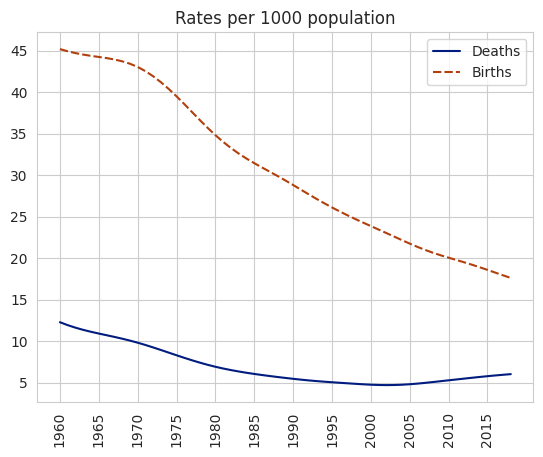

In [23]:
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.lineplot(data=mexicoBirthsDeaths)
plt.title('Rates per 1000 population')
plt.xticks(np.arange(0, len(mexicoBirthsDeaths)+1, 5))
plt.xticks(rotation=90)
plt.xlabel('')

In [31]:
columns = ['Country Name', '2018']
deathTop10 = Death[columns]
deathTop10 = deathTop.sort_values(by='2018', ascending=False)
deathTop10 = deathTop.head(3)
deathTop10.head()

,Country Name,2018
19,Bulgaria,15.4
143,Latvia,15.0
246,Ukraine,14.8


In [30]:
columns = ['Country Name', '2018']
countries =('Mexico','United States')
deathTopMexico = Death[Death['Country Name'].isin(countries)][columns]
#deathTopMexico = deathTopMexico.sort_values(by='2018', ascending=False)
deathTopMexico = deathTopMexico.head(3)
deathTopMexico.head()

,Country Name,2018
152,Mexico,6.01
249,United States,8.60


In [45]:
deathTop = pd.concat([deathTopMexico, deathTop10])
##deathTop.set_index('Country Name', inplace=True)
deathTop.head()

,Country Name,2018
152,Mexico,6.01
249,United States,8.60
19,Bulgaria,15.40
143,Latvia,15.00
246,Ukraine,14.80


<Axes: title={'center': 'Death rate 2018'}, ylabel='Country Name'>

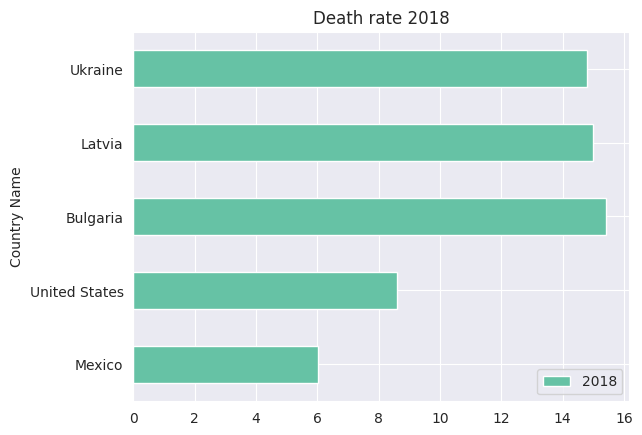

In [46]:
sns.set_palette('Set2')
sns.set_style('darkgrid')
deathTop.plot(kind='barh',x='Country Name',y='2018',title='Death rate 2018')

In [54]:
Birth = pd.read_csv('/content/1698424162537-Birth.csv',encoding='UTF-8-sig',sep=',')
columns=['Country Name', '2018']
BirthShare = Birth[columns]
BirthShare = BirthShare[BirthShare['2018']!=0]
BirthShare = BirthShare.dropna()
BirthShare['mean'] = BirthShare['2018'].astype(float).mean()
BirthShare['Status'] = np.where(BirthShare['2018'].astype(float) > BirthShare['mean'], 'Over Mean', 'Below Mean')
BirthShare.head()


,Country Name,2018,mean,Status
0,Aruba,11.652,19.827983,Below Mean
1,Afghanistan,32.487,19.827983,Over Mean
2,Angola,40.729,19.827983,Over Mean
3,Albania,11.780,19.827983,Below Mean
4,Andorra,7.200,19.827983,Below Mean


In [55]:
columns = ['Country Name', 'Status']
birthStatus = BirthShare[columns]
birthStatus.set_index('Status', inplace=True)
birthStatus = birthStatus.groupby('Status').count()
birthStatus.reset_index(inplace=True)
birthStatus['Country Name'] = birthStatus['Country Name'].astype(int)
birthStatus.head()

,Status,Country Name
0,Below Mean,148
1,Over Mean,103


([<matplotlib.patches.Wedge at 0x78f7d7cfc650>,
 [Text(-0.3057001669438905, 1.0566680689461936, 'Below Mean'),
  Text(0.30570026587629384, -1.0566680403244737, 'Over Mean')],
 [Text(-0.16674554560575847, 0.5763644012433783, '59.0%'),
  Text(0.16674559956888751, -0.576364385631531, '41.0%')])

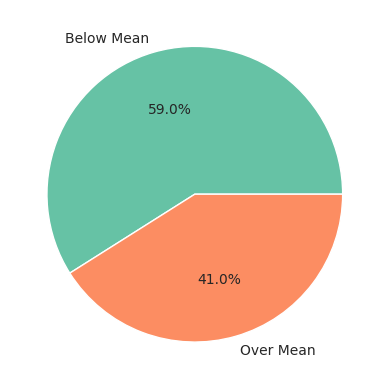

In [56]:
plt.pie('Country Name',labels='Status',data=birthStatus,autopct='%1.1f%%')